# ALUNOS: 
## João Vitor Santos
## Luiz Felipe Hagy



# CIÊNCIA DE DADOS
## Desafio 2: Previsão da ocupação hospitalar

### Etapas:
- Entendimento do problema 
- Tratamento dos Dados
- Visualização dos dados
- Análise Exploratória dos Dados
- Aprendizado de máquina

O **desafio** consiste na previsão de ocupação hospitalar, focando na análise dos dados de atendimentos do pronto atendimento. 

O **objetivo** é identificar os fatores que podem influenciar ou aumentar o número de entradas de pacientes nesse serviço. As causas para o aumento das entradas podem ser diversas e depender de diferentes variáveis. A partir da análise desses dados, o desafio é desenvolver modelos preditivos que ajudem a antecipar a demanda do pronto atendimento, permitindo uma melhor gestão da ocupação hospitalar e a alocação eficiente de recursos.

Serão fornecidos os seguintes dados para a análise:
- ID do atendimento
- Data/hora da entrada 
- CID
- Data de nascimento
- Sexo 
- Clínica 
- Convenio 
- Classificação de Risco
- Motivo da Alta 
- Data da Alta 
.

## Importar as bibliotecas necessárias e a base de dados. Realizar a visualização da mesma 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
def corrigir_csv(caminho_arquivo):
    # os dados estão todos na primeira coluna apesar da presença dos cabeçalhos
    # é necessário separar os mesmos
    df = pd.read_csv(caminho_arquivo, sep=";", dtype=str)

    if df.shape[1] == 1:
        df = df.iloc[:, 0].str.split(";", expand=True)
        df.columns = df.iloc[0]
        df = df[1:].reset_index(drop=True)
    
    return df

atendimentos = corrigir_csv("csv/Atendimentos Hospital.csv")
risco = corrigir_csv("csv/Classificação Risco.csv")
diagnosticos = corrigir_csv("csv/Diagnósticos.csv")
glasgow = corrigir_csv("csv/Escala Glasglow.csv")
internamentos = corrigir_csv("csv/Internamentos.csv")
procedimentos = corrigir_csv("csv/Procedimentos Realizados.csv")
sinais = corrigir_csv("csv/Sinais Vitais.csv")

dados = [ atendimentos, risco, diagnosticos, glasgow, internamentos, procedimentos, sinais ]

In [6]:
for dado in dados:
    print(dado.head(5))
    print('--- // ---')

  id_atendimento id_paciente           dt_atendimento ds_especialidade  \
0        1770909      441245  2022-06-04 14:40:08.000        Pediatria   
1        1770967      148092  2022-06-04 17:48:54.000           Médico   
2        1771006      186203  2022-06-04 20:43:46.000        Pediatria   
3        1773849      639654  2022-06-08 12:36:11.000        Pediatria   
4        1776305      582637  2022-06-11 14:47:17.000        Pediatria   

             dt_nascimento    ds_sexo ds_tipo_atendimento ds_motivo_alta  \
0  2015-02-04 00:00:00.000  Masculino      Pronto Socorro           Alta   
1  1940-07-18 00:00:00.000   Feminino      Pronto Socorro           Alta   
2  2009-05-28 00:00:00.000  Masculino      Pronto Socorro           Alta   
3  2018-12-05 00:00:00.000  Masculino      Pronto Socorro           Alta   
4  2019-04-03 00:00:00.000   Feminino      Pronto Socorro           Alta   

  ds_convenio  ds_clinica                  dt_alta  
0      Unimed  Pediátrica  2022-06-04 16:26:0

## Tratamento dos dados: verificar e corrigir o domínios dos campos, se há dados faltantes, verificar cardinalidade, identificar colunas categóricas, de visualizar as informações estatísticas da base (dados numéricos e não numéricos)

In [8]:
for dado in dados:
    dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222122 entries, 0 to 222121
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   id_atendimento       222122 non-null  object
 1   id_paciente          222122 non-null  object
 2   dt_atendimento       222122 non-null  object
 3   ds_especialidade     221981 non-null  object
 4   dt_nascimento        222001 non-null  object
 5   ds_sexo              222122 non-null  object
 6   ds_tipo_atendimento  222122 non-null  object
 7   ds_motivo_alta       221798 non-null  object
 8   ds_convenio          222122 non-null  object
 9   ds_clinica           221973 non-null  object
 10  dt_alta              221798 non-null  object
dtypes: object(11)
memory usage: 18.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384379 entries, 0 to 384378
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----

In [9]:
# atendimentos
atendimentos['dt_atendimento'] = pd.to_datetime(atendimentos['dt_atendimento'], errors='coerce')
atendimentos['dt_nascimento'] = pd.to_datetime(atendimentos['dt_nascimento'], errors='coerce')
atendimentos['dt_alta'] = pd.to_datetime(atendimentos['dt_alta'], errors='coerce')

# classificação de risco
risco['dt_triagem'] = pd.to_datetime(risco['dt_triagem'], errors='coerce')

# diagnósticos
diagnosticos['dt_diagnostico'] = pd.to_datetime(diagnosticos['dt_diagnostico'], errors='coerce')

# glasgow
glasgow['dt_avaliacao'] = pd.to_datetime(glasgow['dt_avaliacao'], errors='coerce')
glasgow['qt_glasgow'] = pd.to_numeric(glasgow['qt_glasgow'], errors='coerce')

# internamentos
internamentos['dt_atendimento'] = pd.to_datetime(internamentos['dt_atendimento'], errors='coerce')
internamentos['dt_nascimento'] = pd.to_datetime(internamentos['dt_nascimento'], errors='coerce')
internamentos['dt_alta'] = pd.to_datetime(internamentos['dt_alta'], errors='coerce')

# procedimentos realizados
procedimentos['qt_procedimento'] = pd.to_numeric(procedimentos['qt_procedimento'], errors='coerce')

In [10]:
for dado in dados:
    dado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222122 entries, 0 to 222121
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id_atendimento       222122 non-null  object        
 1   id_paciente          222122 non-null  object        
 2   dt_atendimento       222122 non-null  datetime64[ns]
 3   ds_especialidade     221981 non-null  object        
 4   dt_nascimento        222001 non-null  datetime64[ns]
 5   ds_sexo              222122 non-null  object        
 6   ds_tipo_atendimento  222122 non-null  object        
 7   ds_motivo_alta       221798 non-null  object        
 8   ds_convenio          222122 non-null  object        
 9   ds_clinica           221973 non-null  object        
 10  dt_alta              221798 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(8)
memory usage: 18.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384379 entries, 0 to 3843

In [11]:
# cardinalidade
for dado in dados:
    print(dado.nunique())

id_atendimento         222122
id_paciente             80809
dt_atendimento         219942
ds_especialidade           57
dt_nascimento           25192
ds_sexo                     2
ds_tipo_atendimento         5
ds_motivo_alta             11
ds_convenio                 8
ds_clinica                 33
dt_alta                219409
dtype: int64
id_atendimento    204645
dt_triagem            25
ds_risco               6
dtype: int64
id_atendimento         214272
id_paciente             79303
id_medico                 560
dt_diagnostico         220728
cd_doenca                3013
ds_tipo_diagnostico         2
dtype: int64
id_atendimento      148470
id_pessoa_fisica       336
dt_avaliacao        226859
qt_glasgow              16
dtype: int64
id_atendimento         163605
id_paciente             95525
dt_atendimento         159756
ds_especialidade           53
dt_nascimento           28825
ds_sexo                     2
ds_tipo_atendimento         1
ds_motivo_alta             22
ds_convenio    

In [12]:
# nulos
for dado in dados:
    print(dado.isnull().sum())

id_atendimento           0
id_paciente              0
dt_atendimento           0
ds_especialidade       141
dt_nascimento          121
ds_sexo                  0
ds_tipo_atendimento      0
ds_motivo_alta         324
ds_convenio              0
ds_clinica             149
dt_alta                324
dtype: int64
id_atendimento    0
dt_triagem        0
ds_risco          0
dtype: int64
id_atendimento         0
id_paciente            0
id_medico              0
dt_diagnostico         0
cd_doenca              0
ds_tipo_diagnostico    0
dtype: int64
id_atendimento      0
id_pessoa_fisica    0
dt_avaliacao        1
qt_glasgow          0
dtype: int64
id_atendimento            0
id_paciente               0
dt_atendimento            0
ds_especialidade       5194
dt_nascimento           441
ds_sexo                   0
ds_tipo_atendimento       0
ds_motivo_alta          407
ds_convenio               0
ds_clinica              248
dt_alta                 404
dtype: int64
id_atendimento       0
id_pacien

In [13]:
# dados estatísticos
for dado in dados:
    print(dado.describe())

                      dt_atendimento                  dt_nascimento  \
count                         222122                         222001   
mean   2023-07-04 21:46:39.442698496  1995-01-05 15:38:38.535502208   
min              2022-06-01 00:02:48            1916-08-19 00:00:00   
25%    2022-12-21 23:02:24.249999872            1982-11-18 00:00:00   
50%              2023-07-07 17:20:27            1996-01-28 00:00:00   
75%    2024-02-06 20:53:05.249999872            2013-09-30 00:00:00   
max              2024-05-31 23:46:36            2024-05-27 00:00:00   

                             dt_alta  
count                         221798  
mean   2023-07-05 01:09:14.675844352  
min              2021-04-19 17:04:23  
25%       2022-12-22 01:23:44.500000  
50%              2023-07-07 17:29:57  
75%    2024-02-07 10:01:54.750000128  
max              2024-12-02 13:00:00  
                          dt_triagem
count                         384379
mean   2023-07-02 17:53:35.573171200
min     

### As colunas com baixa cardinalidade (colunas com poucos valores únicos) são:
- sexo
- especialidade
- tipo_atendimento
- motivo_alta
- convenio
- clinica
- risco
- tipo_diagnostico
- glasgow

### Colunas determinadas como categóricas
- Atendimentos: sexo, motivo_alta, ds_convenio, ds_clinica, ds_especialidade
- Risco: ds_risco
- Diagnósticos: ds_tipo_diagnostico,

In [16]:
print(atendimentos.columns)
print(procedimentos.columns)
print(glasgow.columns)
print(diagnosticos.columns)
print(risco.columns)


Index(['id_atendimento', 'id_paciente', 'dt_atendimento', 'ds_especialidade',
       'dt_nascimento', 'ds_sexo', 'ds_tipo_atendimento', 'ds_motivo_alta',
       'ds_convenio', 'ds_clinica', 'dt_alta'],
      dtype='object')
Index(['id_atendimento', 'id_paciente', 'id_medico', 'cd_procedimento',
       'dt_procedimento', 'qt_procedimento', 'ds_especialidade'],
      dtype='object')
Index(['id_atendimento', 'id_pessoa_fisica', 'dt_avaliacao', 'qt_glasgow'], dtype='object')
Index(['id_atendimento', 'id_paciente', 'id_medico', 'dt_diagnostico',
       'cd_doenca', 'ds_tipo_diagnostico'],
      dtype='object')
Index(['id_atendimento', 'dt_triagem', 'ds_risco'], dtype='object')


In [17]:
# criando o df
df = atendimentos.merge(procedimentos[['id_atendimento', 'qt_procedimento']], on='id_atendimento', how='left') \
                 .merge(glasgow[['id_atendimento', 'qt_glasgow']], on='id_atendimento', how='left') \
                 .merge(diagnosticos[['id_atendimento', 'cd_doenca']], on='id_atendimento', how='left') \
                 .merge(risco[['id_atendimento', 'ds_risco']], on='id_atendimento', how='left')

df['ds_especialidade'] = df['ds_especialidade'].fillna('Não especificado')

df['tempo_internacao'] = (df['dt_alta'] - df['dt_atendimento']).dt.days
df['tempo_internacao'] = df['tempo_internacao'].fillna(0).astype(int)

df['idade'] = (df['dt_atendimento'] - df['dt_nascimento']).dt.days // 365

df.head()

,id_atendimento,id_paciente,dt_atendimento,ds_especialidade,dt_nascimento,ds_sexo,ds_tipo_atendimento,ds_motivo_alta,ds_convenio,ds_clinica,dt_alta,qt_procedimento,qt_glasgow,cd_doenca,ds_risco,tempo_internacao,idade
0,1770909,441245,2022-06-04 14:40:08,Pediatria,2015-02-04,Masculino,Pronto Socorro,Alta,Unimed,Pediátrica,2022-06-04 16:26:03,1.0,NaN,B349,Pouco Urgente - Risco Intermediário (Verde),0,7.0
1,1770909,441245,2022-06-04 14:40:08,Pediatria,2015-02-04,Masculino,Pronto Socorro,Alta,Unimed,Pediátrica,2022-06-04 16:26:03,1.0,NaN,B349,Pouco Urgente - Risco Intermediário (Verde),0,7.0
2,1770967,148092,2022-06-04 17:48:54,Médico,1940-07-18,Feminino,Pronto Socorro,Alta,Unimed,Médica,2022-06-04 18:39:31,1.0,NaN,N309,Pouco Urgente - Risco Intermediário (Verde),0,81.0
3,1771006,186203,2022-06-04 20:43:46,Pediatria,2009-05-28,Masculino,Pronto Socorro,Alta,Unimed,Pediátrica,2022-06-05 08:43:46,1.0,NaN,B342,Pouco Urgente - Risco Intermediário (Verde),0,13.0
4,1773849,639654,2022-06-08 12:36:11,Pediatria,2018-12-05,Masculino,Pronto Socorro,Alta,Unimed,Pediátrica,2022-06-08 13:28:21,1.0,NaN,J40,Pouco Urgente - Risco Intermediário (Verde),0,3.0


## Visualizando de forma gráfica: utilizar as boas práticas de visualização de dados

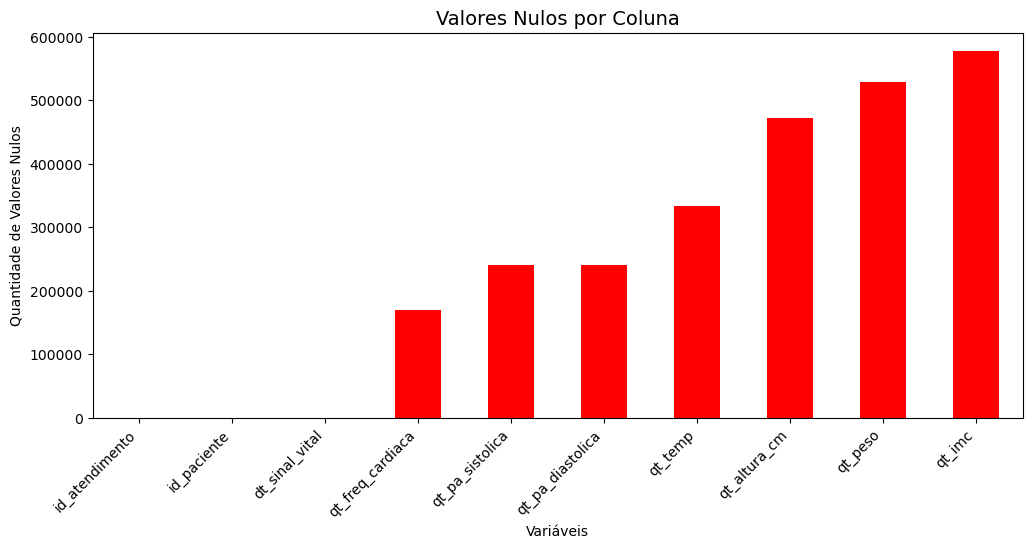

In [19]:
# evitamos usar a tabela de sinais vitais, pois tem nulos em excesso
nulos_sinais = sinais.isnull().sum()
plt.figure(figsize=(12, 5))
nulos_sinais.sort_values().plot(kind='bar', color='red')

plt.title('Valores Nulos por Coluna', fontsize=14)
plt.xlabel('Variáveis')
plt.ylabel('Quantidade de Valores Nulos')
plt.xticks(rotation=45, ha='right')

plt.show()

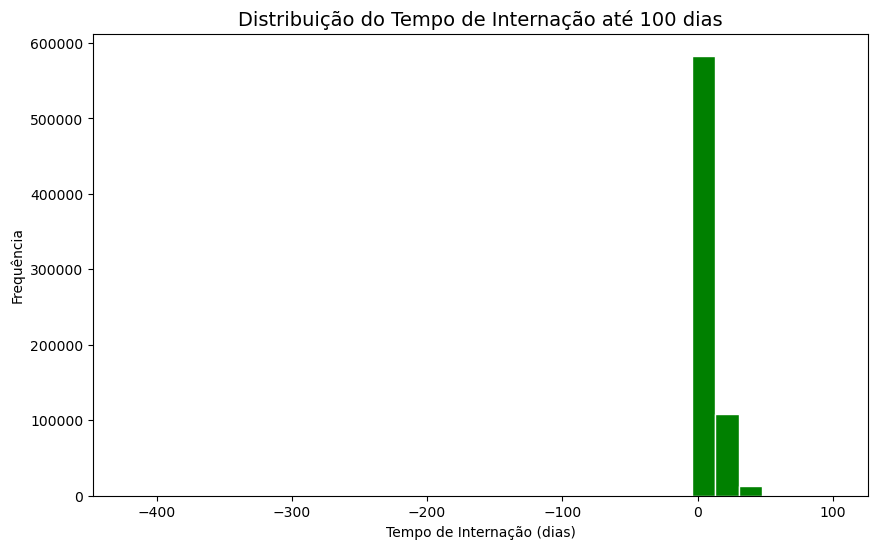

In [20]:
# tempo de internação até 100 dias
plt.figure(figsize=(10, 6))
df.loc[df['tempo_internacao'] <= 100, 'tempo_internacao'].hist(bins=30, color='green', edgecolor='white')

plt.title('Distribuição do Tempo de Internação até 100 dias', fontsize=14)
plt.xlabel('Tempo de Internação (dias)')
plt.ylabel('Frequência')
plt.grid(False)
plt.show()

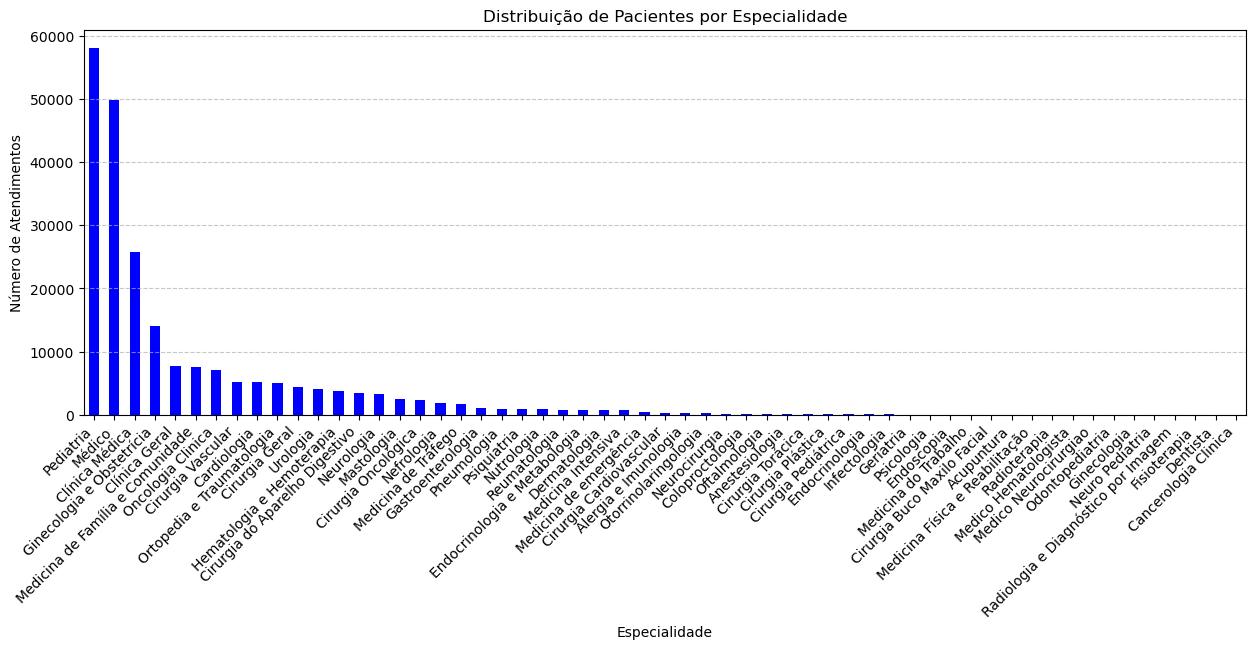

In [21]:
# distribuição de atendimentos por especialidade (quais especialidades tem maior demanda)
especialidades = atendimentos['ds_especialidade'].value_counts()
plt.figure(figsize=(15, 5))
especialidades.plot(kind='bar', color='blue')
plt.title('Distribuição de Pacientes por Especialidade')
plt.xlabel('Especialidade')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

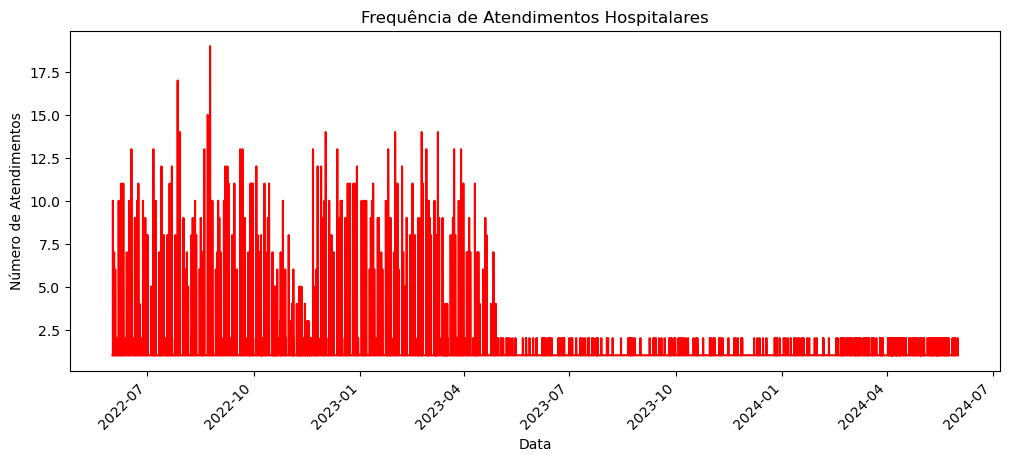

In [22]:
# evolucao da ocupação ao longo do tempo (picos e sazonalidades)
atendimentos_por_dia = atendimentos['dt_atendimento'].value_counts().sort_index()
plt.figure(figsize=(12, 5))
atendimentos_por_dia.plot(kind='line', color='red')
plt.title('Frequência de Atendimentos Hospitalares')
plt.xlabel('Data')
plt.ylabel('Número de Atendimentos')
plt.xticks(rotation=45)
plt.show()

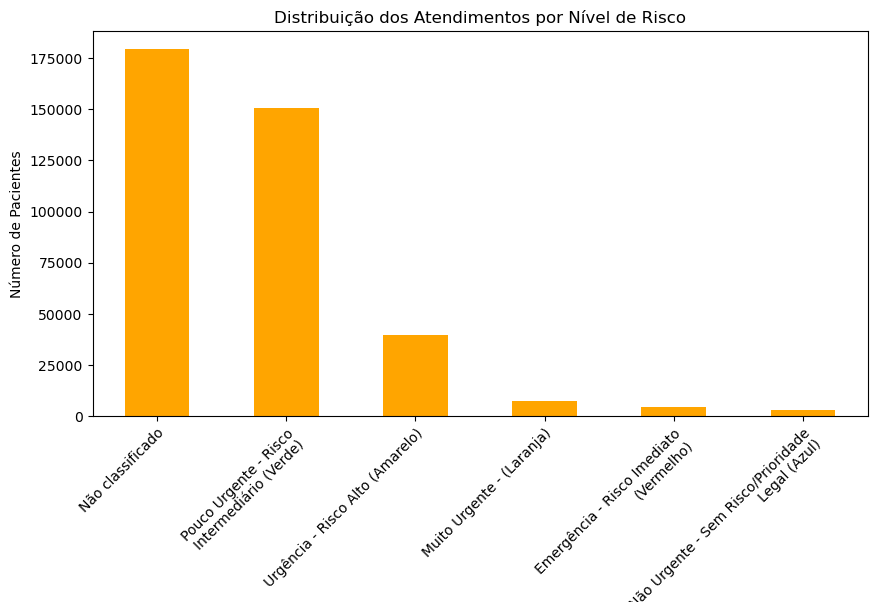

In [23]:
# classificação de risco
classificacao_risco = risco['ds_risco'].value_counts()
plt.figure(figsize=(10, 5))
classificacao_risco.plot(kind='bar', color='orange')
plt.title('Distribuição dos Atendimentos por Nível de Risco')
plt.xlabel('Classificação de Risco')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45, ha='right', wrap=True)
plt.show()

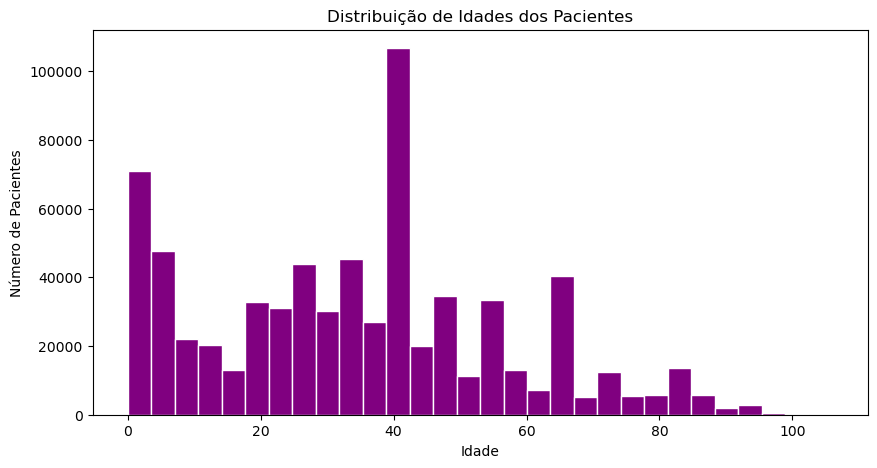

In [24]:
# distribuição demográfica
plt.figure(figsize=(10, 5))
df['idade'].plot(kind='hist', bins=30, color='purple', edgecolor='white')
plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()

## Análise Exploratória dos dados 

**O boxplot**

- Permite visualizar os percentis e valores máximo e mínimo dos dados
- Permite visualizar, além de simetria e dispersão dos dados, valores extremos (outliers)
- O valor máximo e mínimo são calculados baseado no interquartil

idade    Axes(0.125,0.11;0.775x0.77)
dtype: object

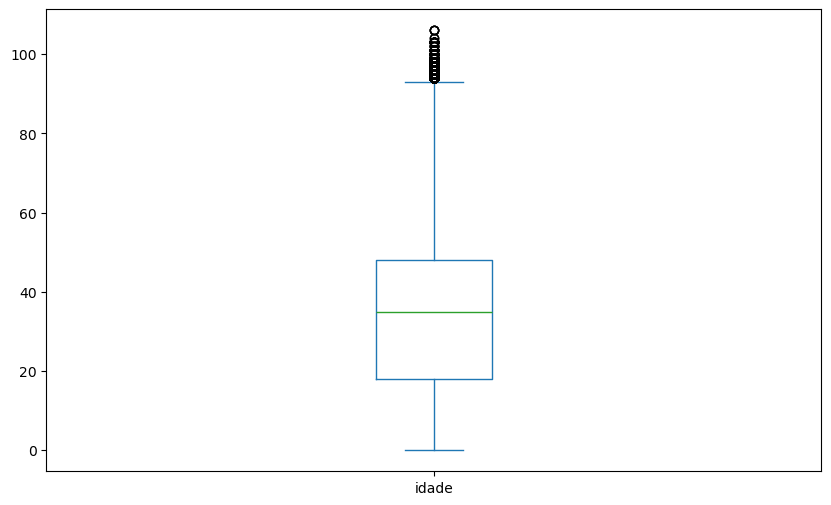

In [26]:
df['idade'].plot(kind='box', figsize=(10,6), subplots=True)

qt_glasgow    Axes(0.125,0.11;0.775x0.77)
dtype: object

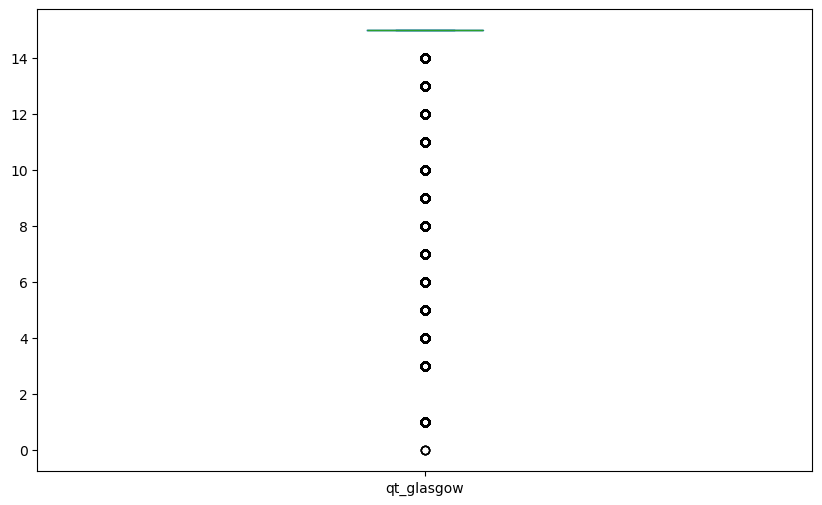

In [27]:
df['qt_glasgow'].plot(kind='box', figsize=(10,6), subplots=True)

qt_procedimento    Axes(0.125,0.11;0.775x0.77)
dtype: object

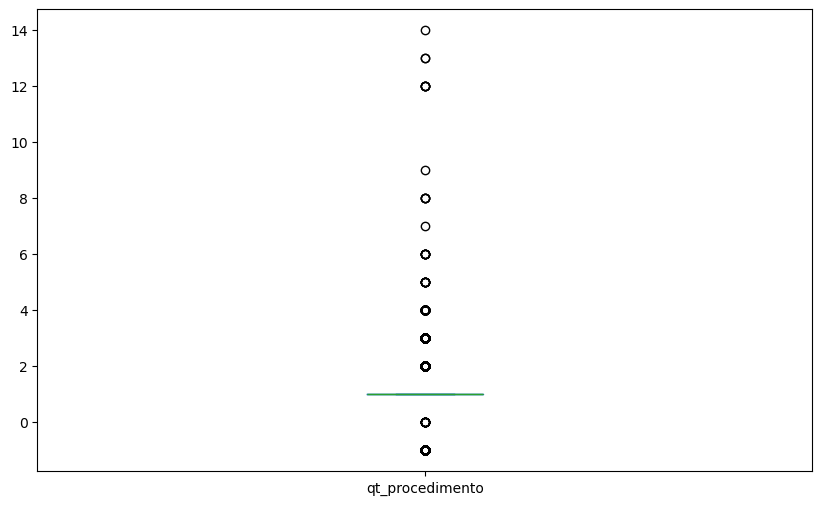

In [28]:
df['qt_procedimento'].plot(kind='box', figsize=(10,6), subplots=True)

tempo_internacao    Axes(0.125,0.11;0.775x0.77)
dtype: object

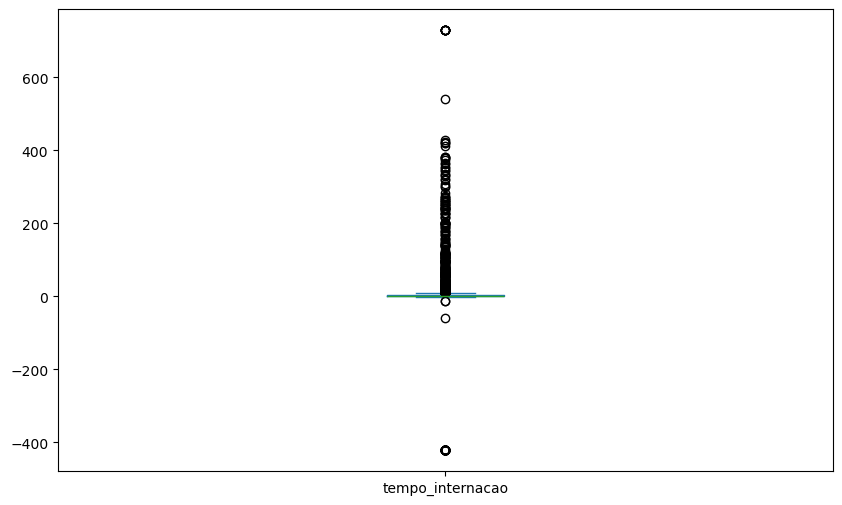

In [29]:
df['tempo_internacao'].plot(kind='box', figsize=(10,6), subplots=True)

tempo_internacao    Axes(0.125,0.11;0.775x0.77)
dtype: object

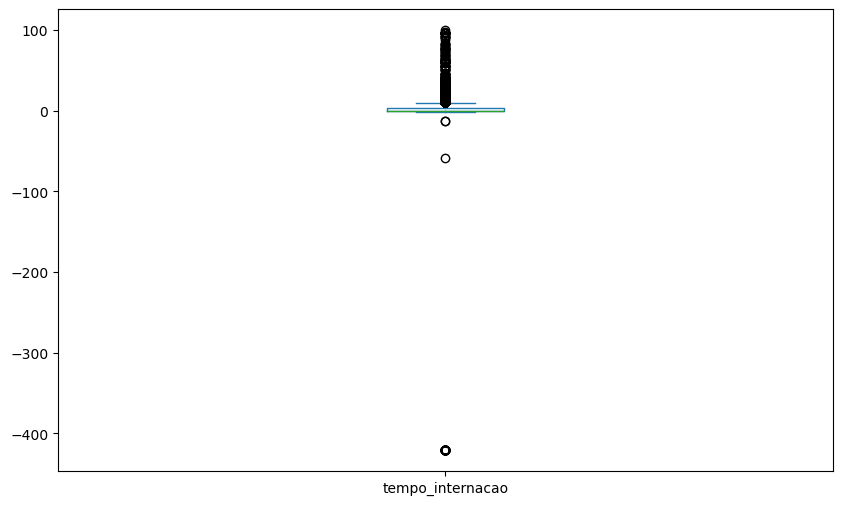

In [30]:
df.loc[df['tempo_internacao'] <= 100, 'tempo_internacao'].plot(kind='box', figsize=(10,6), subplots=True)

**Criando uma matriz para mostrar a correlação de cada par de variáveis**

<Figure size 1000x800 with 0 Axes>

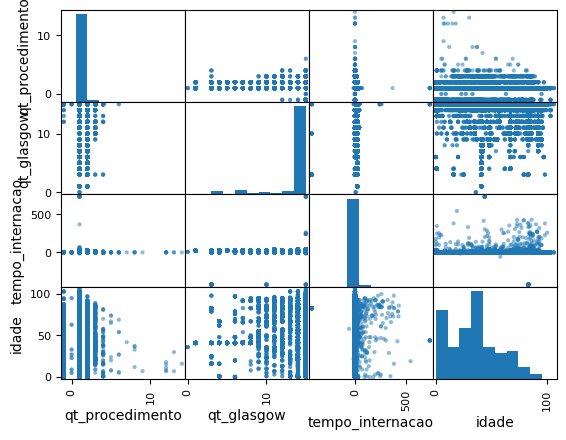

In [32]:
from pandas.plotting import scatter_matrix

colunas_numericas = df.select_dtypes(include=['number']).columns.tolist()

plt.figure(figsize=(10, 8))
scatter_matrix(df[colunas_numericas])
plt.show()

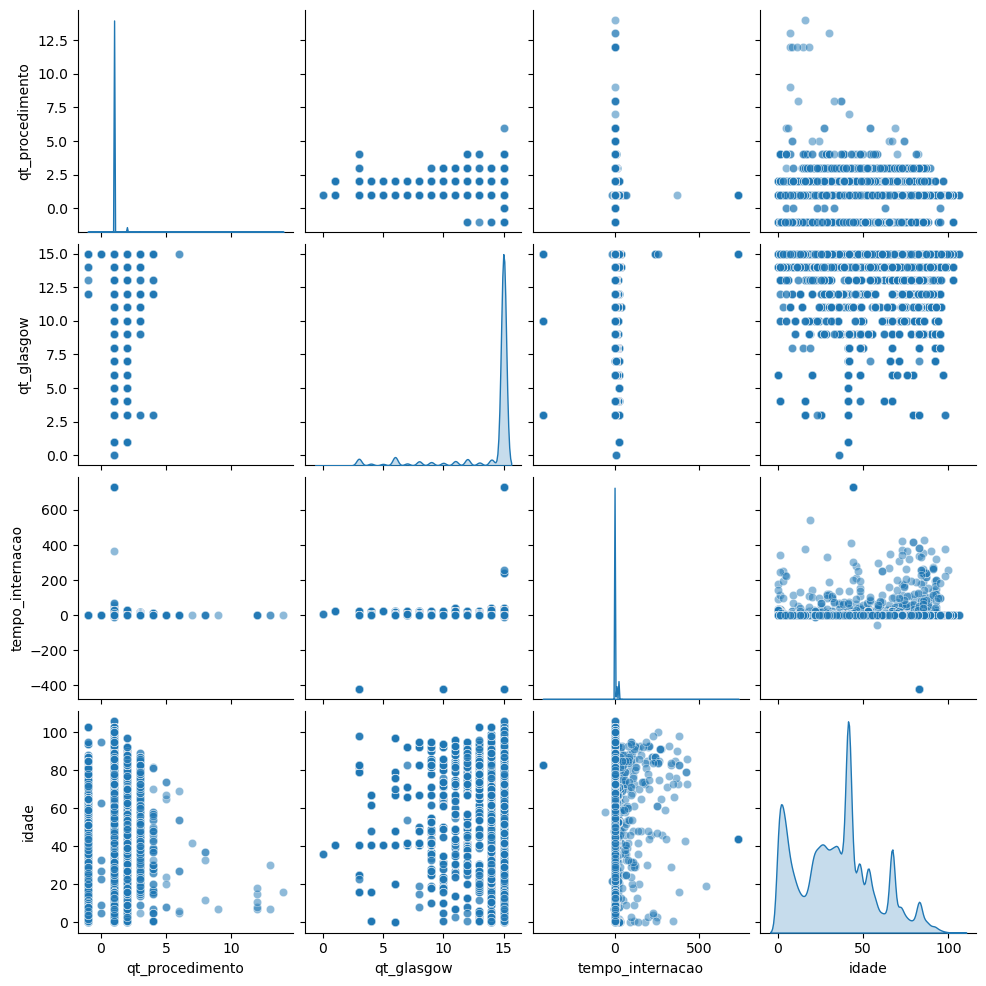

In [33]:
# Apresentar a matriz de correlação da base plotando no pairplot
sns.pairplot(df[colunas_numericas], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()

## Visualizando apenas o KDE**
- KDE: Kernel Density Estimation
    - Mede a chance de uma variável aleatória assumir determinado valor
    - A probabilidade é dada pela integral abaixo da curva na faixa de valor selecionada
- Parece uma "versão de linha suavizada" de um histograma

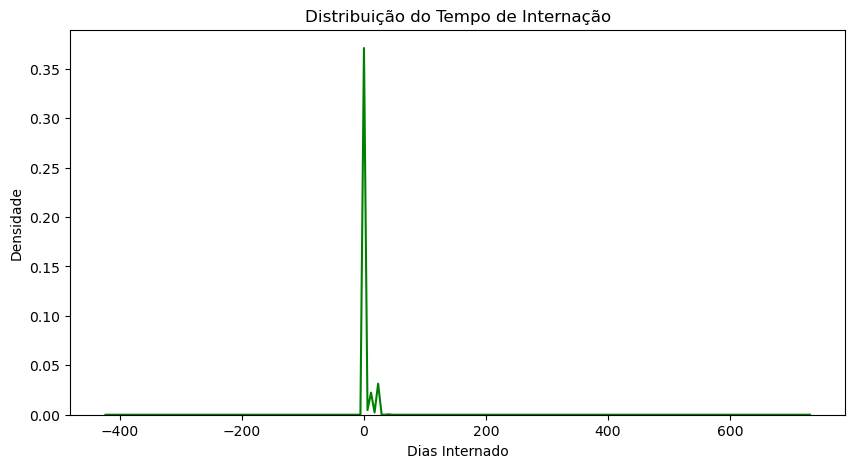

In [35]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['tempo_internacao'].dropna(), color='green')

plt.title('Distribuição do Tempo de Internação')
plt.xlabel('Dias Internado')
plt.ylabel('Densidade')
plt.show()

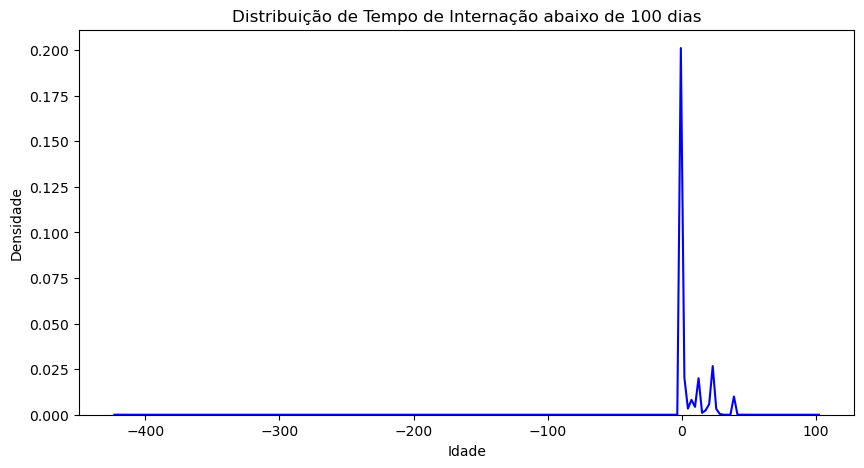

In [36]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df.loc[df['tempo_internacao'] <= 100, 'tempo_internacao'], color='blue')

plt.title('Distribuição de Tempo de Internação abaixo de 100 dias')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

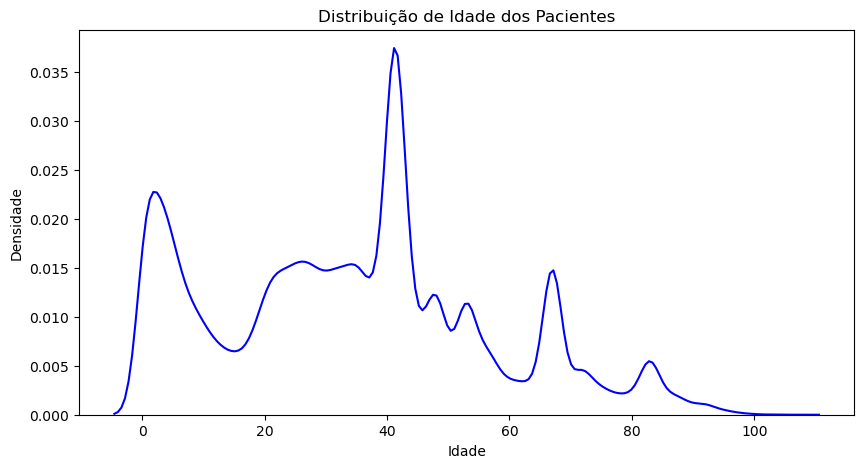

In [37]:
plt.figure(figsize=(10, 5))
sns.kdeplot(df['idade'], color='blue')

plt.title('Distribuição de Idade dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Densidade')
plt.show()

## Heatmap de correlação

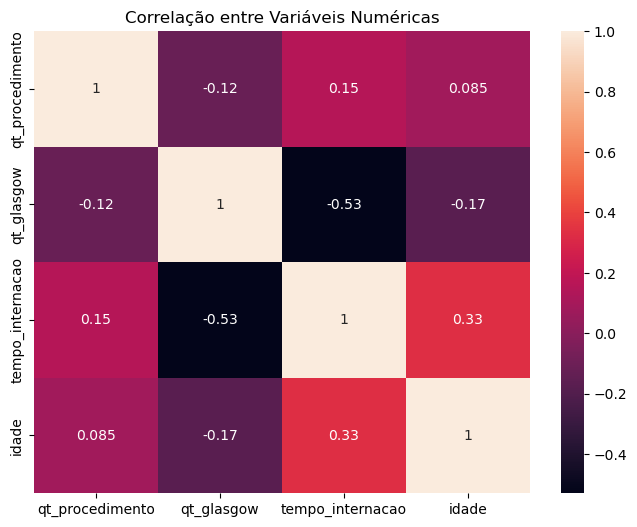

In [39]:
correlacao = df[colunas_numericas].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlacao, annot=True)

plt.title('Correlação entre Variáveis Numéricas')
plt.show()

## Aprendizado de Máquina

- Definir 3 algorítmos de aprendizado de máquina a ser testado no Desafio


In [41]:
# Importar as bibliotecas necessárias
# Definir as variáveis de input e a target
# Dividir a base de dados em treino e teste

In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd

X = df[['idade', 'qt_glasgow']]
y = df['tempo_internacao']

X = X.fillna(X.mean())
y = y.fillna(y.mean())

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

modelo_linear = LinearRegression()
modelo_linear.fit(X_train, y_train)
y_pred = modelo_linear.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 82.37
R-squared (R2): 0.31


In [43]:
# Treinar o modelo
# Predizer o modelo
# Avaliar o modelo

In [44]:
# devido a fraca correlação entre as variáveis numéricas, não foi possível criar um modelo que
# pudesse predizer a ocupação com eficiência e acurácia 

## Apresente uma conclusão para o desafio, demonstrando graficamente

## Padrões identificados

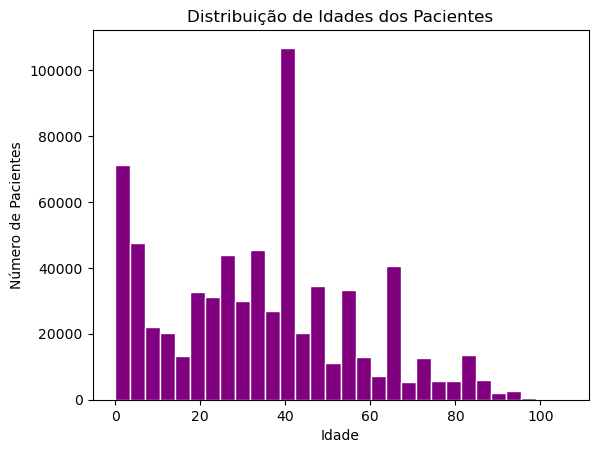

In [47]:
df['idade'].plot(kind='hist', bins=30, color='purple', edgecolor='white')

plt.title('Distribuição de Idades dos Pacientes')
plt.xlabel('Idade')
plt.ylabel('Número de Pacientes')
plt.show()

- Há um pico presente nos primeiros anos de vida dos pacientes - o qual pode ser atribuído ao acompanhamento da saúde e crescimento de bebês e crianças
- Entre 20 e 40 anos nota-se outro pico em atendimentos, que, como o gráfico abaixo representa, é constituído predominantemente pelas especialidades "médico" e "clínica médica", com uma grande discrepância entre os dois (onde a freqência de pacientes

<Figure size 1200x800 with 0 Axes>

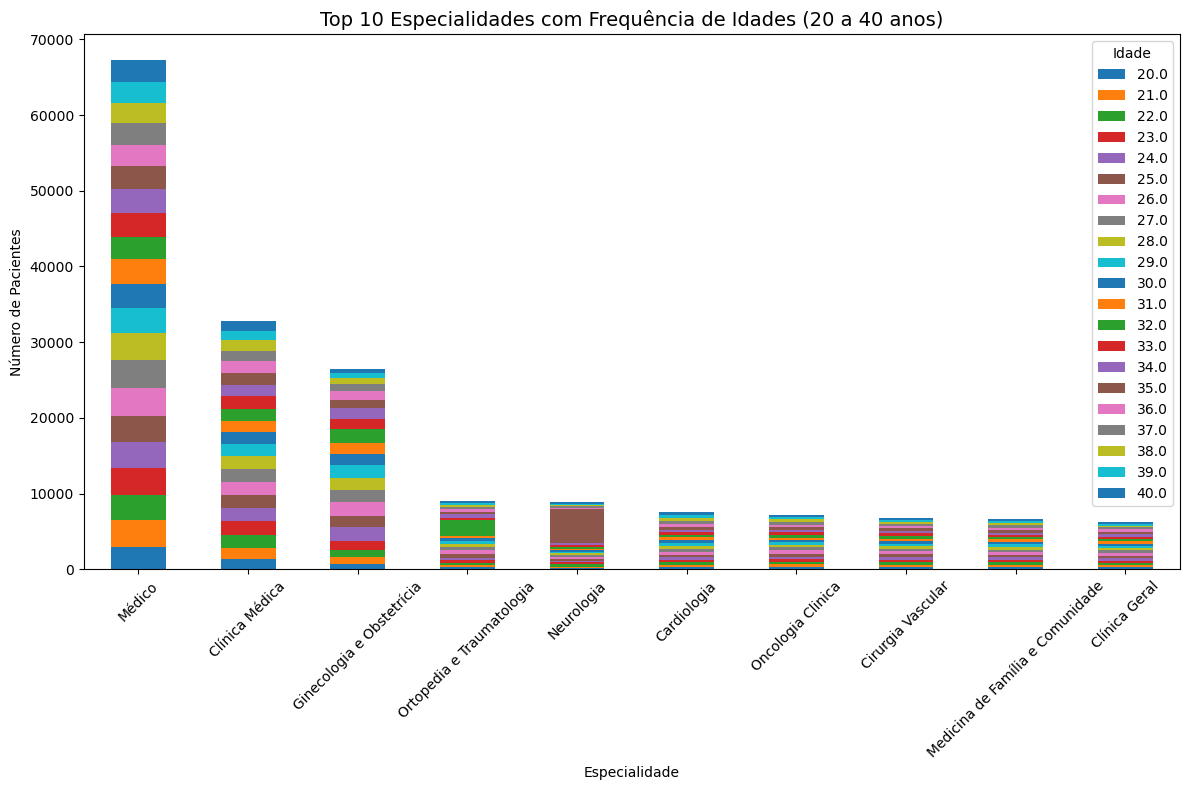

In [49]:
df_20_40 = df[(df['idade'] >= 20) & (df['idade'] <= 40)]
idade_especialidade = df_20_40.groupby(['ds_especialidade', 'idade']).size().unstack(fill_value=0)
especialidades_top10 = idade_especialidade.sum(axis=1).sort_values(ascending=False).head(10)

# top 10 especialidades mais frequentadas
idade_especialidade_top10 = idade_especialidade.loc[especialidades_top10.index]

plt.figure(figsize=(12, 8))
idade_especialidade_top10.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('Top 10 Especialidades com Frequência de Idades (20 a 40 anos)', fontsize=14)
plt.xlabel('Especialidade')
plt.ylabel('Número de Pacientes')
plt.xticks(rotation=45)
plt.legend(title='Idade')
plt.tight_layout()
plt.show()

- Portanto, é válido concluir que a maioria das pessoas entre 20 e 40 anos foram atendidas para realizar consultas de rotina, consultas preventivas e outros procedimentos similares
- 